# Water potability prediction

# EDA : Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.columns = df.columns.str.lower()
df.columns 

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [4]:
for c in df.columns:
    print(c, ': dtype=', df[c].dtype)
    print('unique values:', df[c].nunique())
    print(df[c].unique()[:10])
    print()
    

ph : dtype= float64
unique values: 2785
[        nan  3.71608008  8.09912419  8.31676588  9.09222346  5.58408664
 10.22386216  8.63584872 11.18028447  7.36064011]

hardness : dtype= float64
unique values: 3276
[204.89045547 129.42292051 224.23625939 214.37339409 181.10150924
 188.31332377 248.07173527 203.36152258 118.98857909 227.23146924]

solids : dtype= float64
unique values: 3276
[20791.31898075 18630.05785797 19909.54173229 22018.41744078
 17978.98633893 28748.68773905 28749.71654353 13672.0917639
 14285.58385422 25484.50849099]

chloramines : dtype= float64
unique values: 3276
[7.30021187 6.63524588 9.2758836  8.05933238 6.54659997 7.54486879
 7.51340847 4.56300869 7.80417355 9.07720002]

sulfate : dtype= float64
unique values: 2495
[368.51644135          nan 356.88613564 310.13573752 326.67836291
 393.66339552 303.30977116 268.64694075 404.04163468 326.62435346]

conductivity : dtype= float64
unique values: 3276
[564.30865417 592.88535913 418.60621306 363.26651616 398.41081338


In [5]:
df.describe().round(3)

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000,3276.000,3276.000,3276.000,2495.000,3276.000,3276.000,3114.000,3276.000,3276.000
mean,7.081,196.369,22014.093,7.122,333.776,426.205,14.285,66.396,3.967,0.390
std,1.594,32.880,8768.571,1.583,41.417,80.824,3.308,16.175,0.780,0.488
min,0.000,47.432,320.943,0.352,129.000,181.484,2.200,0.738,1.450,0.000
25%,6.093,176.851,15666.690,6.127,307.699,365.734,12.066,55.845,3.440,0.000
50%,7.037,196.968,20927.834,7.130,333.074,421.885,14.218,66.622,3.955,0.000
75%,8.062,216.667,27332.762,8.115,359.950,481.792,16.558,77.337,4.500,1.000
max,14.000,323.124,61227.196,13.127,481.031,753.343,28.300,124.000,6.739,1.000


In [6]:
df.potability.value_counts(normalize=True)

potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

<Axes: xlabel='potability', ylabel='count'>

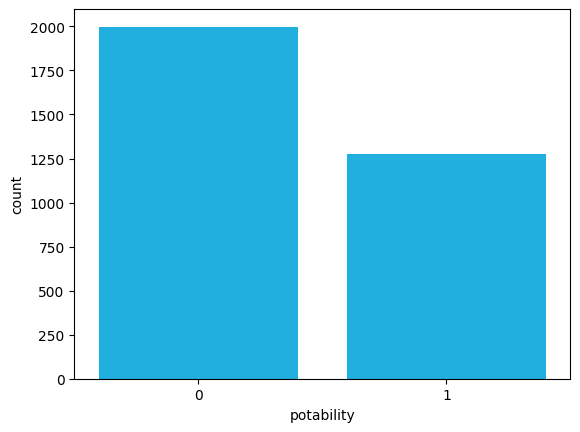

In [7]:
sns.countplot(x='potability', data=df, color='deepskyblue')


In [8]:
df.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

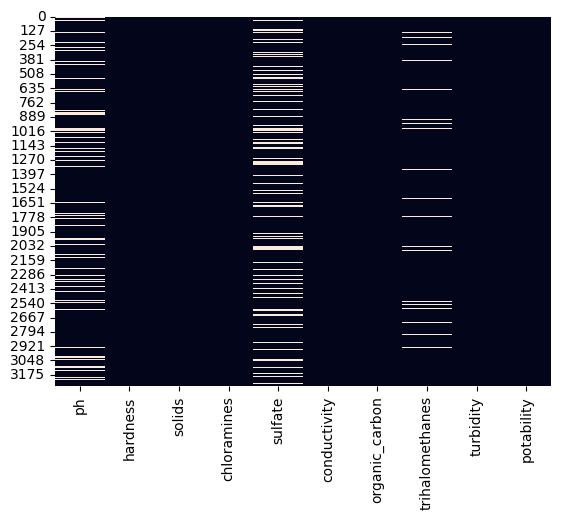

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Data Preprocessing

## Handling missing data

In [10]:
df = df.dropna(subset=['ph'])
df = df.dropna(subset=['trihalomethanes'])

In [11]:
df.isnull().sum()

ph                   0
hardness             0
solids               0
chloramines          0
sulfate            638
conductivity         0
organic_carbon       0
trihalomethanes      0
turbidity            0
potability           0
dtype: int64

In [12]:
sulfate_mean = df.sulfate.mean()

In [13]:
df.sulfate.isna().mean() * 100

24.08456021140053

24% of our records have missing vlaues for 'sulfate' so removing these rows is not a good decision. Instead, we can fill with the mean of each class.

In [14]:
df['sulfate'] = df.groupby('potability')['sulfate'].transform(lambda x: x.fillna(x.median()))


In [15]:
df.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

Now we don't have any missing values.

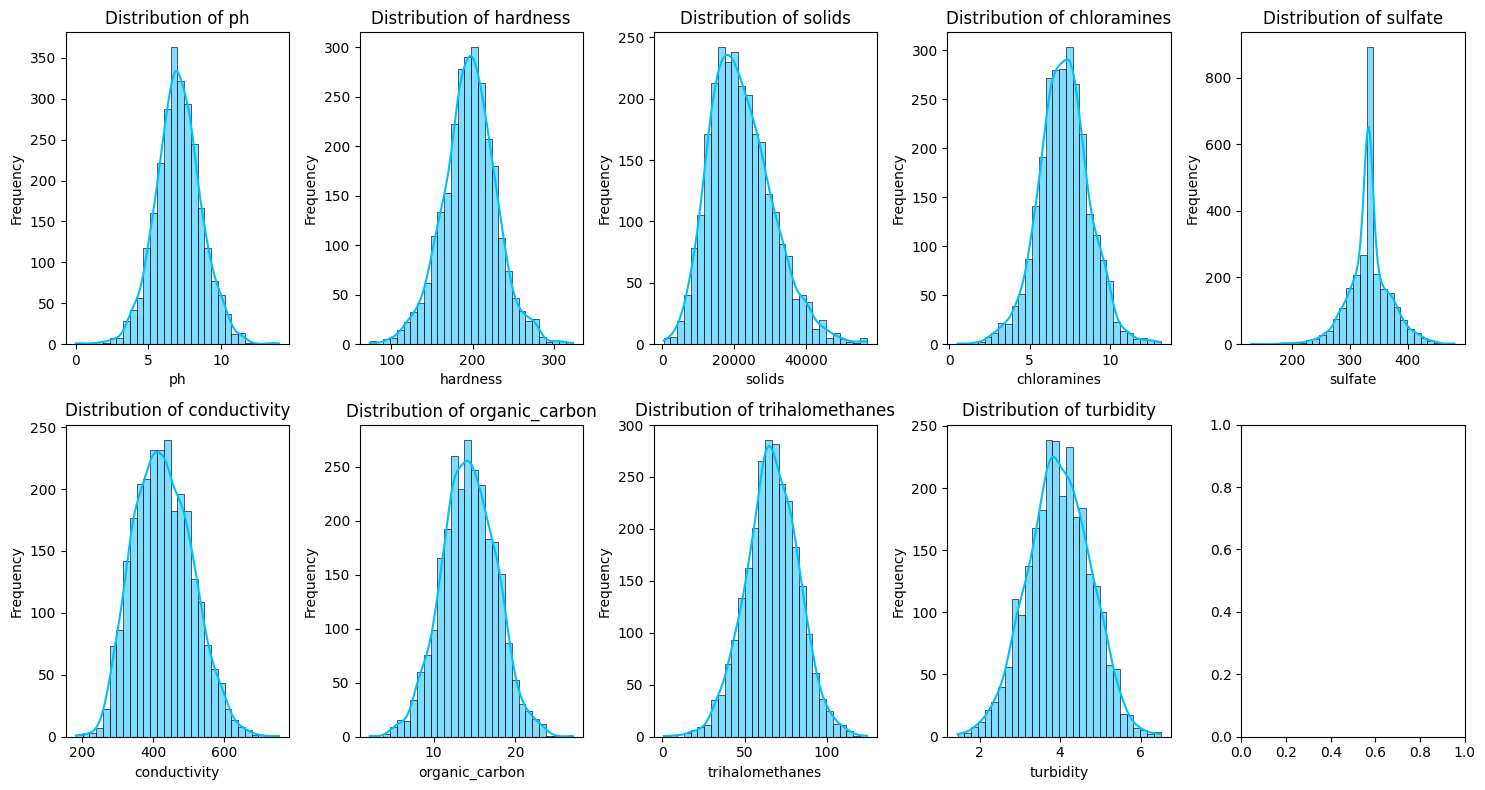

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    if column != 'potability':  # Skip the 'potability' column
        sns.histplot(df[column].dropna(), bins=30, kde=True, ax=axes[i], color='deepskyblue')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Correlation Analysis

In [17]:
corr = df.corr()
corr.round(2)

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.00,0.09,-0.09,-0.03,0.01,0.01,0.04,0.00,-0.04,-0.00
hardness,0.09,1.00,-0.04,-0.03,-0.09,-0.01,0.02,-0.02,-0.02,-0.00
solids,-0.09,-0.04,1.00,-0.06,-0.14,0.01,-0.01,-0.02,0.02,0.03
chloramines,-0.03,-0.03,-0.06,1.00,0.01,-0.02,-0.02,0.02,0.00,0.03
sulfate,0.01,-0.09,-0.14,0.01,1.00,-0.01,0.02,-0.02,-0.01,-0.02
conductivity,0.01,-0.01,0.01,-0.02,-0.01,1.00,0.01,-0.00,0.00,-0.00
organic_carbon,0.04,0.02,-0.01,-0.02,0.02,0.01,1.00,-0.02,-0.02,-0.03
trihalomethanes,0.00,-0.02,-0.02,0.02,-0.02,-0.00,-0.02,1.00,-0.02,0.01
turbidity,-0.04,-0.02,0.02,0.00,-0.01,0.00,-0.02,-0.02,1.00,0.01
potability,-0.00,-0.00,0.03,0.03,-0.02,-0.00,-0.03,0.01,0.01,1.00


<Axes: >

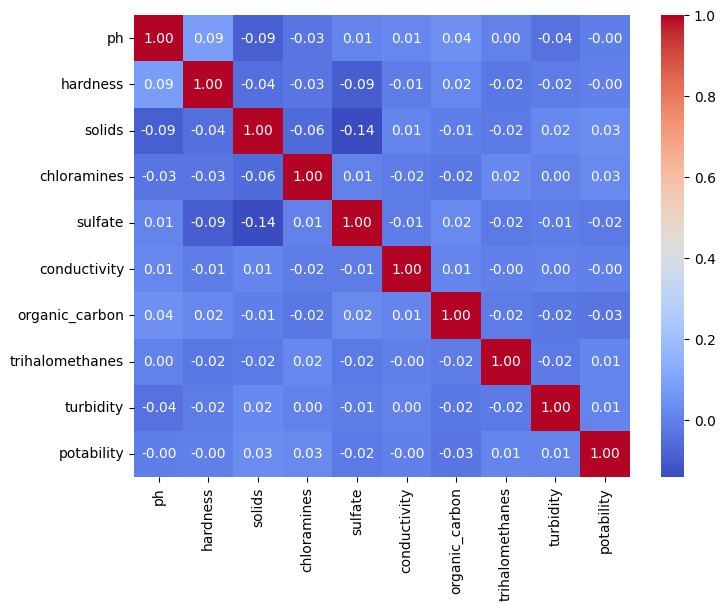

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

## Outlier detection

In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(outliers)


ph                  44
hardness            63
solids              39
chloramines         57
sulfate            214
conductivity        10
organic_carbon      22
trihalomethanes     27
turbidity           15
potability           0
dtype: int64


These outliers will negatively affect the performance of simple models like logistic regression, but I will keep them for demonstration purposes and to see if they'll affect further models. Additionally, this interesting variety in the dataset is similar to real-world scenarios.

## Mutual information score

In [20]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop(columns=['potability'])
y = df['potability']
mi_scores = mutual_info_classif(X, y)
print(pd.Series(mi_scores, index=X.columns).sort_values(ascending=False))


sulfate            0.165938
hardness           0.011735
turbidity          0.006559
conductivity       0.006374
ph                 0.004499
solids             0.004424
chloramines        0.000000
organic_carbon     0.000000
trihalomethanes    0.000000
dtype: float64


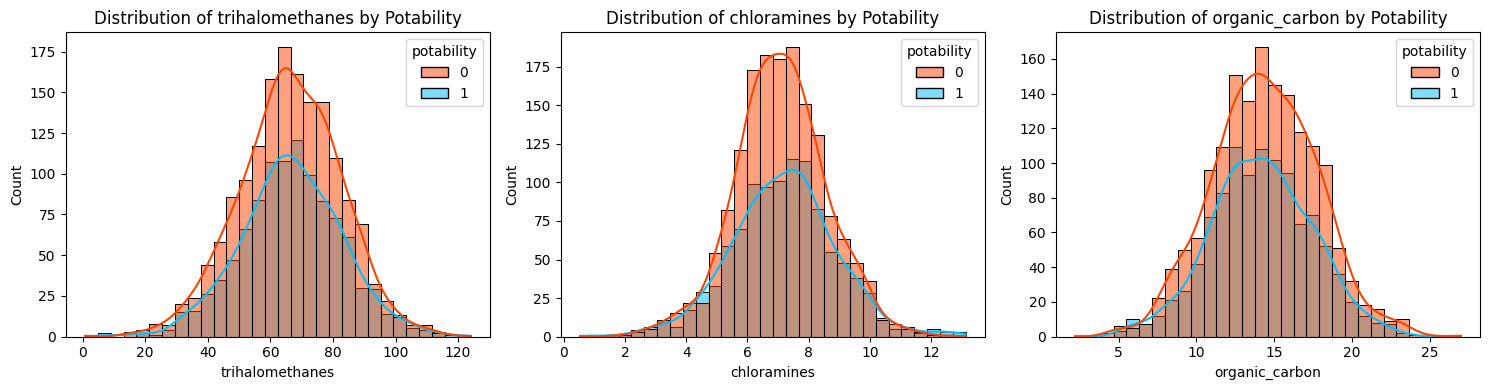

In [21]:
features = ['trihalomethanes', 'chloramines', 'organic_carbon']
custom_palette = {0: 'orangered', 1: 'deepskyblue'}  # 0 = non-potable, 1 = potable

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='potability', bins=30, kde=True, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Distribution of {feature} by Potability')

plt.tight_layout()
plt.show()

#### Observation

Even though features like trihalomethanes, chloramines,  and organic_carbon are important to take into consideration when studying water potability in real world scenarios, we dont see any statistical correlation between them and the potability feature. Hence it's better to ignore them and not use them to train our model.



## Feature Selection

In [22]:
df.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

In [23]:
chosen_features = ['ph', 'hardness', 'solids', 'sulfate', 'conductivity',
       'turbidity', 'potability'
       ]

In [24]:
df = df[chosen_features]
df.head()

,ph,hardness,solids,sulfate,conductivity,turbidity,potability
1,3.716080,129.422921,18630.057858,332.615625,592.885359,4.500656,0
2,8.099124,224.236259,19909.541732,332.615625,418.606213,3.055934,0
3,8.316766,214.373394,22018.417441,356.886136,363.266516,4.628771,0
4,9.092223,181.101509,17978.986339,310.135738,398.410813,4.075075,0
5,5.584087,188.313324,28748.687739,326.678363,280.467916,2.559708,0


# Train Test split

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['potability'])
y = df['potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


## Normalize data

The logistic regression model needs scaled data to work well.
After scaling, each feature will have a mean of 0 and a standard deviation of 1.

In [26]:
from sklearn.preprocessing import StandardScaler
import pickle
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler object (containing the mean and std) 
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [27]:
columns = ['ph', 'hardness', 'solids', 'sulfate', 'conductivity',
       'turbidity']

df_train = pd.DataFrame(X_train_scaled, columns= columns)
df_test = pd.DataFrame(X_test_scaled, columns= columns)

In [28]:
df_train.head()

,ph,hardness,solids,sulfate,conductivity,turbidity
0,-2.349287,0.638513,2.324678,0.000568,-0.940336,-0.864371
1,1.359341,1.870045,0.562076,-1.609352,0.485430,-0.297231
2,-0.010833,-1.800457,0.261025,2.806031,-1.058097,2.013386
3,0.598887,1.342745,0.749012,0.000568,1.802089,-0.578013
4,-0.190136,3.419729,0.744761,-1.097456,-1.510065,-1.879247


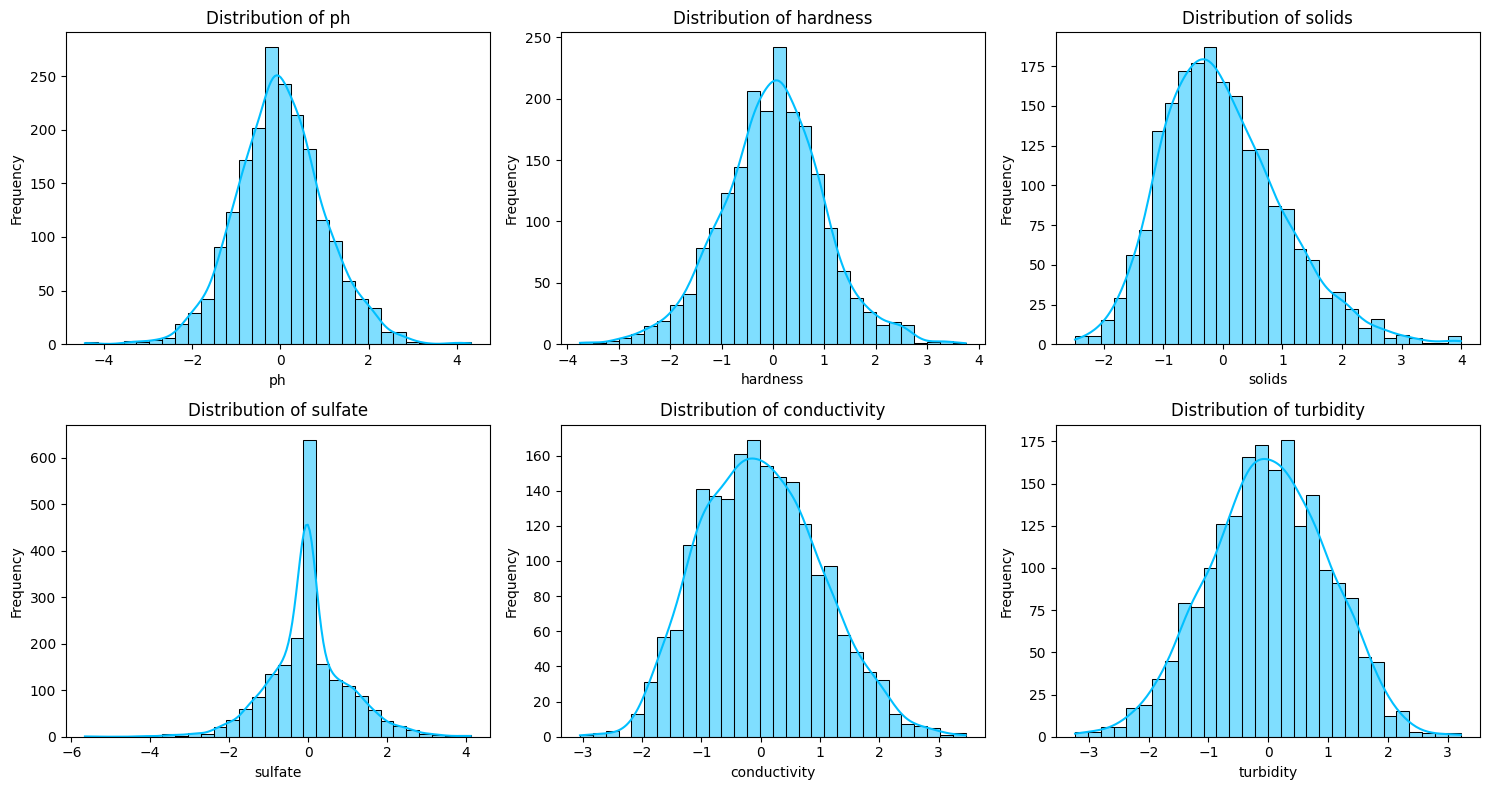

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(df_train.columns):
    if column != 'potability':
        sns.histplot(df_train[column].dropna(), bins=30, kde=True, ax=axes[i], color='deepskyblue')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
df_train.describe().round(3)

,ph,hardness,solids,sulfate,conductivity,turbidity
count,1986.000,1986.000,1986.000,1986.000,1986.000,1986.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000
min,-4.435,-3.755,-2.482,-5.654,-3.049,-3.228
25%,-0.640,-0.604,-0.712,-0.475,-0.742,-0.678
50%,-0.036,0.033,-0.123,0.001,-0.047,0.007
75%,0.608,0.620,0.595,0.469,0.669,0.708
max,4.314,3.749,3.991,4.122,3.454,3.216


# Model : Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [32]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [33]:
y_pred = model.predict_proba(X_test_scaled)[:,0]
auc_model = roc_auc_score(y_test, y_pred)
auc_model

0.5355115282122581

So as we can see, our model performs no better than a random guesser.

## Dummy Model
Let's compare our model to a dummy model

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

# Generate a dummy prediction that classifies all samples as 0
y_dummy_pred = np.zeros_like(y_test)

# Calculate the ROC curve
fpr_dummy, tpr_dummy, thresholds = roc_curve(y_test, y_dummy_pred)

# Calculate the AUC
auc_dummy = roc_auc_score(y_test, y_dummy_pred)
print(auc_dummy)


0.5


In [35]:
fpr_model, tpr_model, _ = roc_curve(y_test, y_pred)

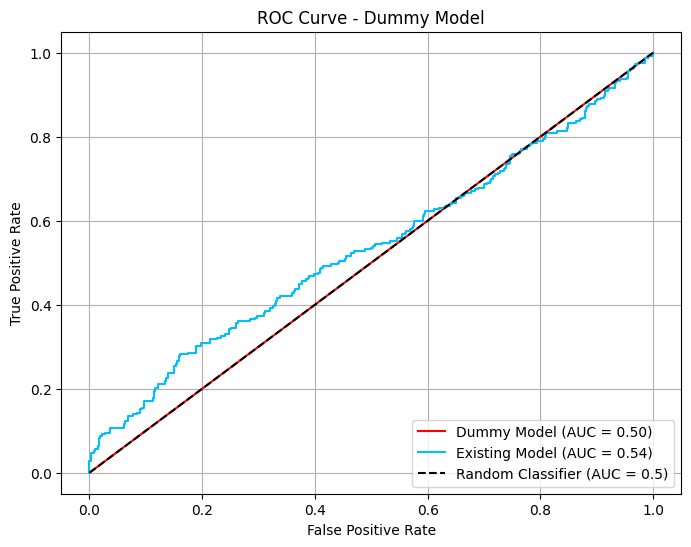

In [76]:

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dummy, tpr_dummy, label=f'Dummy Model (AUC = {auc_dummy:.2f})', color='red')
plt.plot(fpr_model, tpr_model, label=f'Existing Model (AUC = {auc_model:.2f})', color='deepskyblue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.title('ROC Curve - Dummy Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The problem is that all of our features look the same, so they dont help the logistic regression model to make good perdictions. We will try using a more complex model, like a decision tree, to try and capture the underlying patterns that the logistic regression can't find.

# Model : Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [38]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [39]:
y_pred = tree_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_score(y_test, y_pred)

0.6979202873363457

In [40]:
print(export_text(tree_model, feature_names=columns))

We got a way better auc score, but it is still not good enough to use in the real world

# Parameter tuning

Let's start by tuning the max_depth parameter

In [42]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
for d in depths:
    tree_model=DecisionTreeClassifier(max_depth=d)
    tree_model.fit(X_train_scaled, y_train)

    y_pred = tree_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    print('d=', d,'auc=', auc)
    


d= 1 auc= 0.6250000000000001
d= 2 auc= 0.7243415208743677
d= 3 auc= 0.7750019310238287
d= 4 auc= 0.8082203684393465
d= 5 auc= 0.8114162128760669
d= 6 auc= 0.8080996794500444
d= 10 auc= 0.7664764608195265
d= 15 auc= 0.7105974587726414
d= 20 auc= 0.695265129571699
d= None auc= 0.7055381763410962


depth = 5 is the best one, though 4 & 6 are also very close.

Now let's tune the min_sample_leaf parameter

In [45]:
samples =  [1, 5, 10, 15, 20, 50, 100, 200]
for s in samples:
    tree_model=DecisionTreeClassifier(max_depth=5, min_samples_leaf=s)
    tree_model.fit(X_train_scaled, y_train)

    y_pred = tree_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    print('s=', s,'auc=', auc)
    
    


s= 1 auc= 0.8114162128760669
s= 5 auc= 0.8074962345035337
s= 10 auc= 0.8107017340593983
s= 15 auc= 0.8085776078476807
s= 20 auc= 0.8032141891630943
s= 50 auc= 0.8077907156374309
s= 100 auc= 0.8011190283088094
s= 200 auc= 0.8084327810605183


we can see that with d=5, s=1 is best. but lets tune both parameters to be sure

In [47]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        tree_model=DecisionTreeClassifier(max_depth=6, min_samples_leaf=s)
        tree_model.fit(X_train_scaled, y_train)
    
        y_pred = tree_model.predict_proba(X_test_scaled)[:, 1]
        auc = roc_auc_score(y_test, y_pred)
        
        scores.append((d, s, auc))

In [48]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [49]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.803  0.803  0.806
5                 0.806  0.806  0.806
10                0.802  0.803  0.804
15                0.800  0.800  0.802
20                0.799  0.800  0.799
50                0.805  0.805  0.805
100               0.801  0.801  0.801
200               0.808  0.808  0.808

In [50]:
max_auc = df_scores_pivot.max().max()
max_auc

0.8084327810605183

In [51]:
max_position = df_scores_pivot.stack().idxmax()
max_position

C:\Users\User\AppData\Local\Temp\ipykernel_18508\3488662781.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  max_position = df_scores_pivot.stack().idxmax()


auc    (200, 4)
dtype: object

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

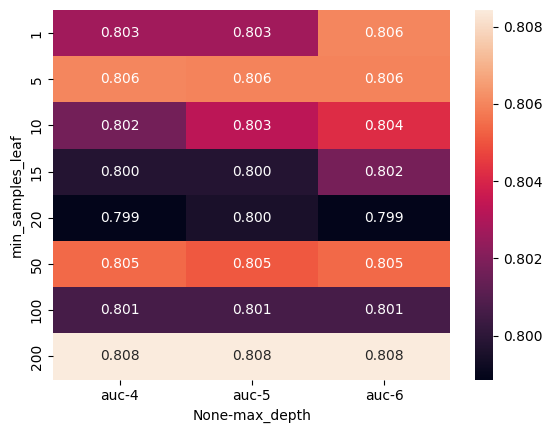

In [52]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

we can conclude that the best depth is 4 and the best min_samples_leaf is 200

In [82]:
tree_model=DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)
tree_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=200)

In [83]:
y_pred = tree_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.8084327810605183

In [55]:
print(export_text(tree_model, feature_names=['ph', 'hardness', 'solids', 'sulfate', 'conductivity',
       'turbidity']))

|--- sulfate <= -0.03
|   |--- sulfate <= -0.08
|   |   |--- ph <= -0.53
|   |   |   |--- class: 0
|   |   |--- ph >  -0.53
|   |   |   |--- solids <= 0.35
|   |   |   |   |--- class: 0
|   |   |   |--- solids >  0.35
|   |   |   |   |--- class: 1
|   |--- sulfate >  -0.08
|   |   |--- class: 1
|--- sulfate >  -0.03
|   |--- sulfate <= 0.02
|   |   |--- class: 0
|   |--- sulfate >  0.02
|   |   |--- ph <= 0.50
|   |   |   |--- sulfate <= 0.61
|   |   |   |   |--- class: 0
|   |   |   |--- sulfate >  0.61
|   |   |   |   |--- class: 1
|   |   |--- ph >  0.50
|   |   |   |--- class: 0



# Model : Random Forest

We will try to make the model even better by using a random forest. It's an ensemble of decision trees.

In [56]:
from sklearn.ensemble import RandomForestClassifier

Tuning the n_estimators paramete, which represents the number of trees in the forest.

In [57]:
scores = []

for n in range(10, 201, 10):
    forest_model = RandomForestClassifier(n_estimators=n, random_state=1)
    forest_model.fit(X_train_scaled, y_train)

    y_pred = forest_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    
    scores.append((n, auc))

In [58]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

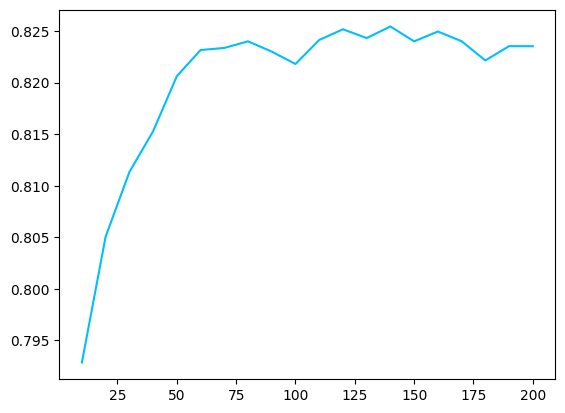

In [59]:
plt.plot(df_scores.n_estimators, df_scores.auc, color='deepskyblue')

In [60]:
max_auc_idx = df_scores['auc'].idxmax()
max_n_estimators = df_scores.loc[max_auc_idx, 'n_estimators']
max_auc = df_scores.loc[max_auc_idx, 'auc']

# Print the results
print(f"max auc: {max_auc}")
print(f"corresponding n_estimators value: {max_n_estimators}")

max auc: 0.8254354458734021
corresponding n_estimators value: 140


Now let's tune the max_depth parameter

In [61]:
res = []

for d in [3, 4, 5, 6, 10, 15, 20, 50]:
    forest_model = RandomForestClassifier(n_estimators=140, random_state=1, max_depth=d)
    forest_model.fit(X_train_scaled, y_train)

    y_pred = forest_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_pred)
    
    res.append((d, auc))

In [62]:
df_res = pd.DataFrame(res, columns=['max_depth', 'auc'])

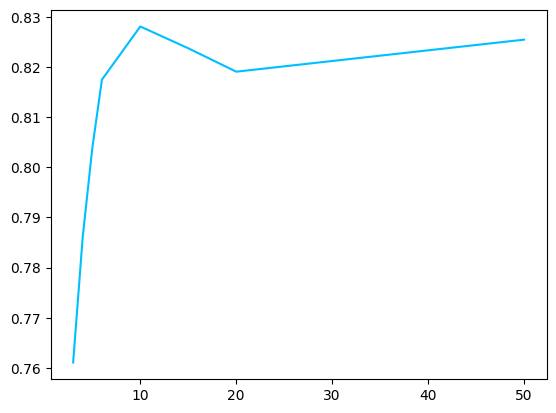

In [63]:
plt.plot(df_res.max_depth, df_res.auc, color='deepskyblue')

In [64]:
max_auc_idx = df_res['auc'].idxmax()
max_d = df_res.loc[max_auc_idx, 'max_depth']
max_auc = df_res.loc[max_auc_idx, 'auc']

# Print the results
print(f"max auc: {max_auc}")
print(f"corresponding max_depth value: {max_d}")

max auc: 0.8280616382806165
corresponding max_depth value: 10


In [65]:
forest_model = RandomForestClassifier(n_estimators=140, max_depth = 10, random_state=1)
forest_model.fit(X_train_scaled, y_train)

y_pred = forest_model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_pred)

auc

0.8280616382806165

### Can we make the auc even better?
# Model : XGBoost

In [94]:
import xgboost as xgb

In [95]:
features = ['ph', 'hardness', 'solids', 'sulfate', 'conductivity',
       'turbidity']
dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=features)
dtest = xgb.DMatrix(X_test_scaled, label=y_test, feature_names=features)

In [96]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 2,
    'verbosity': 1,
}

xgbmodel = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [97]:
y_pred = xgbmodel.predict(dtest)

In [98]:
roc_auc_score(y_test, y_pred)

0.8337967790522535

# GREAT